# ------------------------ Computational simulation -----------------------------

In [2]:
import numpy as np
import math
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider, Button, RadioButtons

In [3]:
# mixing factors (converted from degrees to radians)
th12 = np.radians(33.82)
th23 = np.radians(48.3)
th13 = np.radians(8.61)
delta_CP = np.radians(222)

# mass differences
dm21_sq = 7.53*10**(-5) # eV^2
dm32_sq = 2.52*10**(-3) # eV^2

# mass eigenstates
m1 = 0.75 # eV
m2 = np.sqrt(m1*m1 + dm21_sq) # eV
m3 = np.sqrt(m2*m2 + dm32_sq) # eV

#calculate third mass difference squared
dm31_sq = m3*m3 - m1*m1 # eV^2

# set energy values
E_sun_pp = 4*10**5 # eV 
E_atm=10**11 #eV
E_acc=10**9 #eV
# note: add energy values from other reactions, e.g. atmospheric, nuclear reactor

# important constants:
# speed of light
c = 299792.458 # km s^-1 
# Planck constant
hbar = 6.582119569*10**(-16) # eV*s
# Astronomical unit (i.e. the distance between the Sun and the Earth)
AU = 149597870.700 # km

In [4]:
def prob_transition(alpha, beta, E, L):
    """Calculates the probability of a transition between an initial neutrino alpha to a neutrino beta
    Takes as inputs the initial and final neutrino flavours alpha and beta, 
    the energy at which the neutrino is produced E (in eV),
    and the distance travelled by the particle L (in km)
    Returns the probability of the transition"""
    
    if (alpha == "electron" and beta == "muon") or (alpha == "muon" and beta == "electron"): 
        ar = np.array([th12, dm21_sq])
        arg = 1.27*ar[1]*L/E
        P = np.sin(2*ar[0])*np.sin(2*ar[0])*np.sin(arg)*np.sin(arg)
        
    elif (alpha == "electron" and beta == "tau") or (alpha == "tau" and beta == "electron"):
        ar = np.array([th13, dm31_sq])
        arg = 1.27*ar[1]*L/E
        P = np.sin(2*ar[0])*np.sin(2*ar[0])*np.sin(arg)*np.sin(arg)
        
    elif (alpha == "muon" and beta == "tau") or (alpha == "tau" and beta == "muon"):
        ar = np.array([th23, dm32_sq])
        arg = 1.27*ar[1]*L/E
        P = np.sin(2*ar[0])*np.sin(2*ar[0])*np.sin(arg)*np.sin(arg)
        
    elif (alpha == beta):
        
        if (alpha == "electron"):
            ar1 = np.array([th12, dm21_sq])
            ar2 = np.array([th13, dm31_sq])
            
        elif (alpha == "muon"):
            ar1 = np.array([th12, dm21_sq])
            ar2 = np.array([th23, dm32_sq])
            
        elif (alpha == "tau"):
            ar1 = np.array([th13, dm31_sq])
            ar2 = np.array([th23, dm32_sq])
        
        arg1 = 1.27*ar1[1]*L/E
        arg2 = 1.27*ar2[1]*L/E
        
        P1 = np.sin(2*ar1[0])*np.sin(2*ar1[0])*np.sin(arg1)*np.sin(arg1)
        P2 = np.sin(2*ar2[0])*np.sin(2*ar2[0])*np.sin(arg2)*np.sin(arg2)
        
        if ((P1 + P2) < 1) :
            P = 1 - (P1 + P2)
            
        else:
            P = 0
    
    else:
        return "Error"
    
    return P

<IPython.core.display.Javascript object>


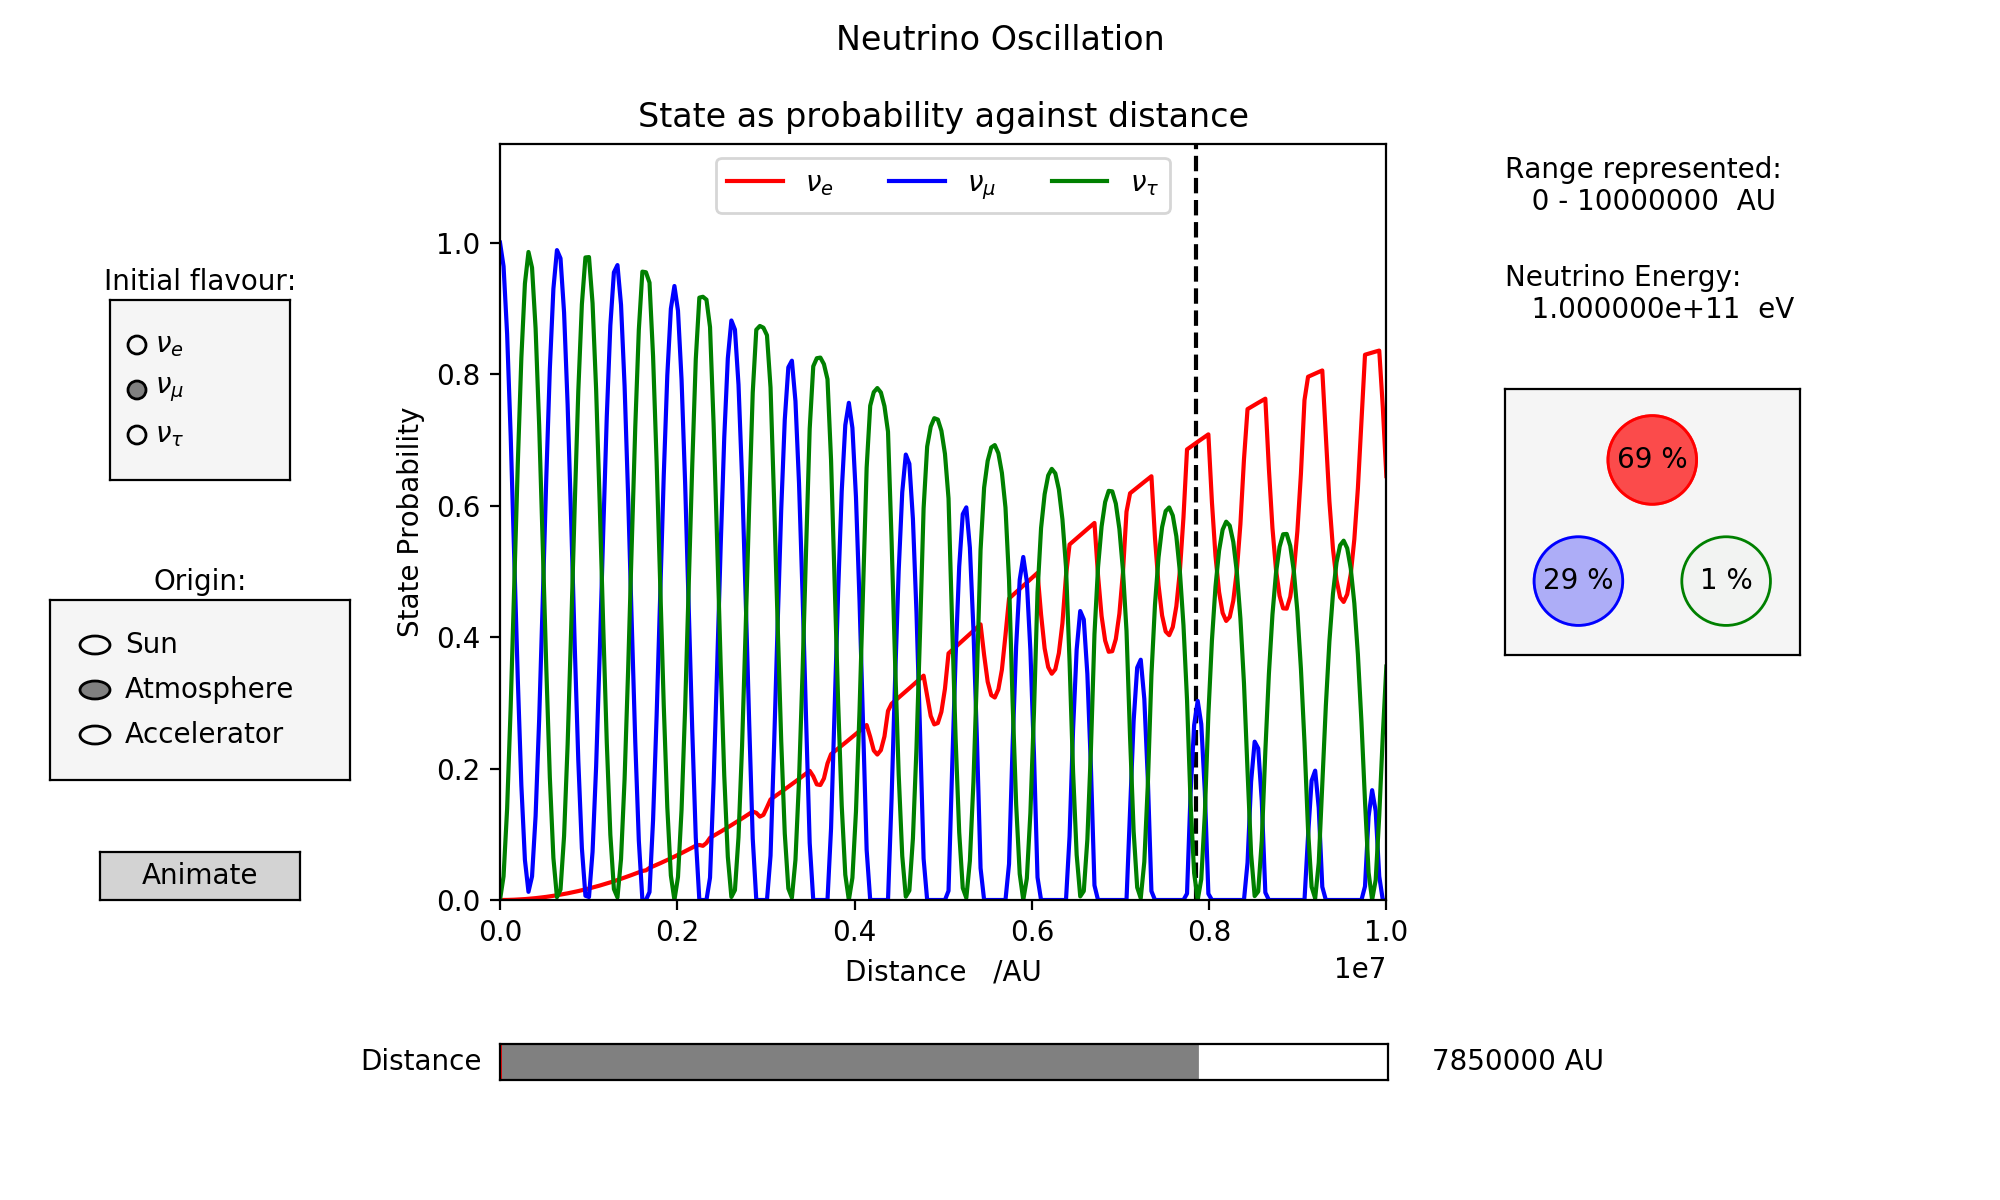

In [12]:
#create plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6),gridspec_kw={'width_ratios': [3, 1]})
global distance 
global energy
energy = E_sun_pp
distance = 50

#flavor box
rax = plt.axes([0.05, 0.6, 0.1, 0.15],facecolor = 'whitesmoke',aspect='equal')
textflavor=plt.text(0.5, 1.1,"Initial flavour:",horizontalalignment='center', verticalalignment='center')
radio = RadioButtons(rax, ("$ν_{e}$", "$ν_{\mu}$", "$ν_{τ}$"))
(radio.circles[0]).set_facecolor('red')
(radio.circles[1]).set_facecolor('blue')
(radio.circles[2]).set_facecolor('green')
radio.activecolor='gray'

def flavor(label):
    global alpha
    flavor_options = {"$ν_{e}$":"electron","$ν_{\mu}$":"muon","$ν_{τ}$":"tau"}
    alpha = flavor_options[label]
    #flavor_color = {'$ν_{e}$':'red','$ν_{\mu}$':'blue','$ν_{τ}$':'green'}
    #radio.activecolor = flavor_color[label]
radio.on_clicked(flavor)

#energy box
rax2 = plt.axes([0.025, 0.35, 0.15, 0.15],facecolor = 'whitesmoke')
textenergy=plt.text(0.5,1.1,"Origin:",horizontalalignment='center', verticalalignment='center')
radio2 = RadioButtons(rax2, ("Sun", "Atmosphere", "Accelerator"))
for circle in radio2.circles:
    circle.set_facecolor('lightgray')
radio2.activecolor='gray'

def energyRadio(label):
    global distance 
    global energy
    energy_options = {"Sun":(E_sun_pp,50),"Atmosphere":(E_atm,10**7),"Accelerator":(E_acc,10**5)}
    (energy,distance) = energy_options[label]
    #distance_options = {"Sun":50,"Atmosphere":1000,"Accelerator":50}
    #distance = distance_options[label]
radio2.on_clicked(energyRadio)

textenergy=plt.text(4.85,2.7,"Neutrino Energy: \n" + "   " + str("{:e}".format(energy)) + "  eV",horizontalalignment='left', verticalalignment='center')
textdistance=plt.text(4.85,3.3,"Range represented: \n" + "   0 - " + str("{0:.0f}".format(distance)) + "  AU",horizontalalignment='left', verticalalignment='center')



# Probability functions
def y1(x):
    p1 = prob_transition(alpha, "electron", energy, x*AU)
    p2 = prob_transition(alpha, "muon", energy, x*AU)
    p3 = prob_transition(alpha, "tau", energy, x*AU)
    norm = p1 + p2 + p3
    return prob_transition(alpha, "electron", energy, x*AU)/norm

def y2(x):
    p1 = prob_transition(alpha, "electron", energy, x*AU)
    p2 = prob_transition(alpha, "muon", energy, x*AU)
    p3 = prob_transition(alpha, "tau", energy, x*AU)
    norm = p1 + p2 + p3
    return prob_transition(alpha, "muon", energy, x*AU)/norm

def y3(x):
    p1 = prob_transition(alpha, "electron", energy, x*AU)
    p2 = prob_transition(alpha, "muon", energy, x*AU)
    p3 = prob_transition(alpha, "tau", energy, x*AU)
    norm = p1 + p2 + p3
    return prob_transition(alpha, "tau", energy, x*AU)/norm
    

    
#fuction to draw animation of the plot
def animate(frame):
    
    ax1.set_xlim(0, distance)
    textenergy.set_text("Neutrino Energy: \n" + "   " + str("{:e}".format(energy)) + "  eV")
    textdistance.set_text("Range represented: \n" + "   0 - " + str("{0:.0f}".format(distance)) + "  AU")
    
    xdata.append(frame)
    ydata1.append(y1(frame))
    ydata2.append(y2(frame))
    ydata3.append(y3(frame))
    
    line1.set_data(xdata,ydata1)
    line2.set_data(xdata,ydata2)
    line3.set_data(xdata,ydata3)
    
    circle1.set_alpha(y1(frame))
    circle2.set_alpha(y2(frame))
    circle3.set_alpha(y3(frame))
    
    text1.set_text(str("{0:.0f}".format(y1(frame)*100) + " %"))
    text2.set_text(str("{0:.0f}".format(y2(frame)*100) + " %"))
    text3.set_text(str("{0:.0f}".format(y3(frame)*100) + " %"))
    
    return line1, line2, line3


def run_animation():
    ani = FuncAnimation(fig, animate, frames=np.linspace(0, distance, 250),blit=False,repeat=False, interval=2)
    fig.canvas.draw()
    
    
#Animate button display
resetax = plt.axes([0.05, 0.25, 0.1, 0.04])
button = Button(resetax, 'Animate', color='lightgray',hovercolor="white")

#Animate event
def anim(event):
    Dslider.reset()
    xdata.clear()
    ydata1.clear()
    ydata2.clear()
    ydata3.clear()
    run_animation()
    
button.on_clicked(anim)


#Slider
d0=0
delta_d=0.005
axslider=plt.axes([0.25, 0.1, 0.444, 0.03])
Dslider = Slider(axslider, 'Distance', 0, 1,color='gray', valinit=d0, valstep=delta_d)
Dslider.valtext.set_visible(False)
textslider=plt.text(1.05,0.5,str(0),horizontalalignment='left', verticalalignment='center')
 
def update(val):
    
    d = Dslider.val
    
    blackline.set_xdata(np.linspace(d*distance,d*distance,100))
    blackline.set_ydata(np.linspace(0,1.15,100))
    
    circle1.set_alpha(y1(d*distance))
    circle2.set_alpha(y2(d*distance))
    circle3.set_alpha(y3(d*distance))
    
    text1.set_text(str("{0:.0f}".format(y1(d*distance)*100) + " %"))
    text2.set_text(str("{0:.0f}".format(y2(d*distance)*100) + " %"))
    text3.set_text(str("{0:.0f}".format(y3(d*distance)*100) + " %"))
    
    textslider.set_text(str("{0:.0f}".format(d*distance)) + " AU")
        
Dslider.on_changed(update)



#set axis and positions
plt.subplots_adjust(left=0.25, bottom=0.25)
ax1.set_xlim(0, distance)
ax1.set_ylim(0, 1.15)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 0.9)
ax2.set_aspect('equal')
ax2.set_facecolor('whitesmoke')

#create lines, circles, and text
blackline, = ax1.plot([],[],'k--')

xdata, ydata1, ydata2, ydata3 = [], [], [], []
line1, = ax1.plot([], [], 'r-',label="$ν_{e}$")
line2, = ax1.plot([], [], 'b-',label="$ν_{\mu}$")
line3, = ax1.plot([], [], 'g-',label="$ν_{τ}$")

circle1 = plt.Circle((0.5, 0.66), radius=0.15, color='r')
circle2 = plt.Circle((0.25, 0.25), radius=0.15, color='b')
circle3 = plt.Circle((0.75, 0.25), radius=0.15, color='g')
border1 = plt.Circle((0.5, 0.66), radius=0.15, edgecolor='r',facecolor='none')
border2 = plt.Circle((0.25, 0.25), radius=0.15, edgecolor='b',facecolor='none')
border3 = plt.Circle((0.75, 0.25), radius=0.15, edgecolor='g',facecolor='none')

ax2.add_artist(circle1)
ax2.add_artist(circle2)
ax2.add_artist(circle3)
ax2.add_artist(border1)
ax2.add_artist(border2)
ax2.add_artist(border3)

text1=ax2.text(0.5, 0.66,"",horizontalalignment='center', verticalalignment='center')
text2=ax2.text(0.25, 0.25,"",horizontalalignment='center', verticalalignment='center')
text3=ax2.text(0.75, 0.25,"",horizontalalignment='center', verticalalignment='center')

fig.suptitle('Neutrino Oscillation')
ax1.set_title("State as probability against distance")
ax1.set_xlabel("Distance   /AU")
ax1.set_ylabel("State Probability")
ax1.legend(ncol = 3,loc = 9)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
plt.show();